# Исследование объявлений о продаже квартир

Получены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Цель**: научиться определять рыночную стоимость объектов недвижимости. 

**Задача**: установить параметры для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**План действий:**
1. Знакомство с данными [Знакомство с данными](#intro)
2. Предобработка данных: Удаление аномалий и дубликатов, заполнение возможных пропусков и проверка  данных. [Предобработка](#preprocessing)
3. Исследовательский анализ данных
4. Выводы

## Знакомство с данными

<a id='intro'></a>

In [1]:
#импортируем нужные библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import warnings

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — общая площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении





In [2]:
#прочитаем файл и выведем первые 15 строк
data = pd.read_csv('./real_estate_data.csv', sep = '\t')
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#получим общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

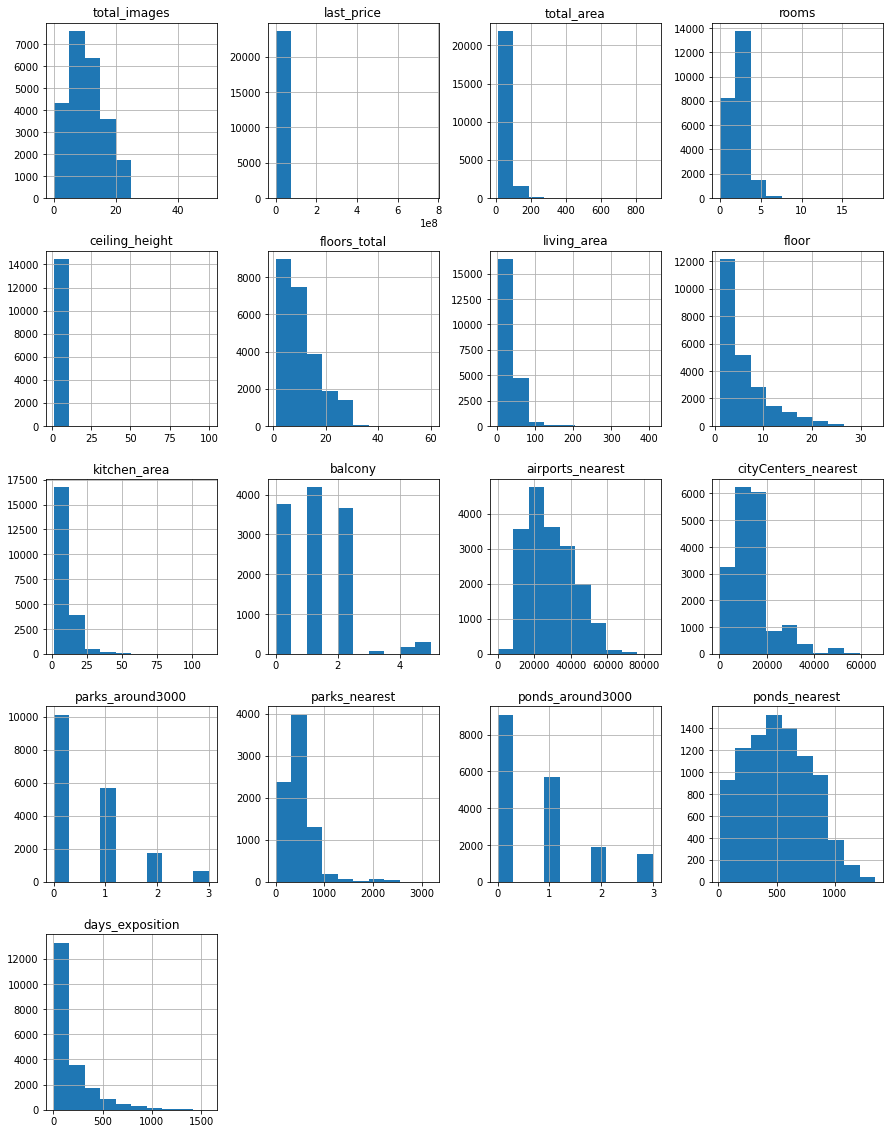

In [4]:
#получим гистограммы по всем столбцам
data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных <a id='preprocessing'></a>

In [5]:
    pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Очистим данные** 

В датасете есть пропуски в следующих слобцах:


1)ceiling_height — высота потолков (м)   

2)floors_total  — всего этажей в доме   

3)living_area — жилая площадь в квадратных метрах (м²)

4)is_apartment — апартаменты (булев тип) 

5)kitchen_area — площадь кухни в квадратных метрах (м²) 

6)balcony — число балконов  

7)locality_name — название населённого пункта    

8)airports_nearest — расстояние до ближайшего аэропорта в метрах (м)   

9) cityCenters_nearest — расстояние до центра города (м)

10)parks_around3000 — число водоёмов в радиусе 3 км   

11)parks_nearest — расстояние до ближайшего парка (м)  

12)ponds_around3000  — число водоёмов в радиусе 3 км  

13)ponds_nearest — расстояние до ближайшего водоёма (м) 

14)days_exposition — сколько дней было размещено объявление (от публикации до снятия) 

### Проверка на явные дубликаты

In [6]:
data.duplicated().sum()

0

Явные дубликаты отсутсвуют

### Поработаем с locality_name — название населённого пункта

Названия населённых пунктов могли записывать по-разному, поэтому данные нужно привести к одному типу. Пропуски могли возникнуть из-за неопределнности местности, из-за незнания или при выгрузке данных. Пропуски заменим на unknow

In [7]:
#найдем уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
#заменим пропуски 
data['locality_name'] = data['locality_name'].fillna('unknow')

#приведем символы к нижнему регистру и выведем количество населенных пунктов
data['locality_name_correct'] = data['locality_name'].str.lower()
data['locality_name_correct'].value_counts(dropna=False)



санкт-петербург                               15721
посёлок мурино                                  522
посёлок шушары                                  440
всеволожск                                      398
пушкин                                          369
                                              ...  
поселок жилгородок                                1
поселок городского типа большая ижора             1
посёлок при железнодорожной станции вещево        1
село никольское                                   1
садовое товарищество новая ропша                  1
Name: locality_name_correct, Length: 365, dtype: int64

In [9]:
#удаление пробелов в начале и конце строки
data['locality_name_correct'] = data['locality_name_correct'].str.strip()

#заменим слова посёлок на поселок
data['locality_name_correct'] = data['locality_name_correct'].str.replace('посёлок', 'поселок') 


In [10]:
#заменим поселок городского типа на поселок и городской поселок на поселок
data['locality_name_correct'] = data['locality_name_correct'].str.replace('поселок городского типа', 'поселок')

data['locality_name_correct'] = data['locality_name_correct'].str.replace('городской поселок', 'поселок')


In [11]:
#ещё раз выведем количество населённых пунктов. С 365 уменьшилось до 323.
data['locality_name_correct'].value_counts(dropna=False)

санкт-петербург              15721
поселок мурино                 556
поселок шушары                 440
всеволожск                     398
пушкин                         369
                             ...  
коттеджный поселок лесное        1
деревня пельгора                 1
поселок гладкое                  1
поселок пчевжа                   1
деревня курковицы                1
Name: locality_name_correct, Length: 323, dtype: int64

Количество населённых пунктов уменьшилось с 365 до 323.

Сгруппируем по названиям населенных пунктов. Найдём минимальные и максимальные значения расстояния до центра города.

In [12]:
#сгруппируем расстояние до центра по названиям населённых пунктов
data.pivot_table(index='locality_name_correct', values='cityCenters_nearest', aggfunc=['median', 'min', 'max'])

,median,min,max
,cityCenters_nearest,cityCenters_nearest,cityCenters_nearest
locality_name_correct,,,
unknow,8943.0,1322.0,41294.0
зеленогорск,53381.0,51115.0,62706.0
колпино,32018.0,29436.0,37477.0
красное село,29140.5,27317.0,41792.0
кронштадт,49575.0,46657.0,51511.0
ломоносов,51677.0,36816.0,61495.0
павловск,32683.0,31533.0,36445.0
петергоф,33771.0,29815.0,49574.0


Была идея заполнить пропущенные названия по расстоянию до центра города, но в таблице можно увидеть перекрестные значения расстояний, поэтому точно не получится определить название. Придется оставлять unknow.

**Найдем диаметры населенных пунктов**

In [13]:
#создадим датафрейм
min_max_cityCenters_nearest = pd.DataFrame({
    'locality_name_correct': ['зеленогорск', 'колпино', 'красное село', 'кронштадт', 'ломоносов', 'павловск', 'петергоф', 'поселок александровская', 'поселок белоостров', 'поселок левашово', 'поселок лисий нос', 'поселок металлострой', 'поселок молодёжное', 'поселок мурино', 'поселок парголово', 'поселок песочный', 'поселок петро-славянка', 'поселок понтонный', 'поселок репино', 'поселок сапёрный', 'поселок стрельна', 'поселок усть-ижора', 'поселок шушары', 'поселок щеглово', 'пушкин', 'санкт-петербург', 'сестрорецк'],
    'min': ['51115.0','29436.0','27317.0','46657.0','36816.0','31533.0','29815.0','27352.0','38868.0','25727.0','26368.0','26696.0','64857.0','21888.0','17994.0','25867.0','27165.0','30709.0','42550.0','35822.0','21813.0','28212.0','17012.0','34085.0','24311.0','181.0','31130.0'],
    'max': ['62706.0','37477.0','41792.0','51511.0','61495.0','36445.0','49574.0','27584.0','38868.0','25727.0','28246.0','29217.0','65968.0','21888.0','24415.0','27835.0','27165.0','33853.0','45226.0','35892.0','24134.0','28233.0','32079.0','34085.0','35610.0','29493.0','42971.0']
})


#объединим датафреймы
data = data.merge(min_max_cityCenters_nearest, on='locality_name_correct', how='left')

#заменим пропуски на 0
#заменим тип данных на числовой
data['max'] = data['max'].fillna(0)
data['min']  = data['min'].fillna(0)
data['max'] = pd.to_numeric(data['max']) 
data['min'] = pd.to_numeric(data['min'])


#найдем диаметры населенных пунктов, добавим в новый столбик
data['diametr_city'] = data['max'] - data['min']

### Поработаем с ceiling_height — высота потолков (м)

Обычно значения потолка варьируется от 2,4 до 3-4 метров.

Здесь могут быть аномальные значения потолков. Например, 25 вместо 2.5 - это значит, что люди ошиблись порядком. 

Также могут быть аномально большие или маленькие значения, а также пропуски. Данные могли сбиться при выгрузке данных или по иным причинам, например из-за неточности заполнения документов продавцами.

In [14]:
#проверим наличие неявных пропусков и аномальных значений
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [15]:
#допустим, что бывают экстремально маленькие квартиры с потолком 2 метра
#выведем аномально маленькие величины потолков
data.query('2 > ceiling_height')['ceiling_height']

5712     1.20
16934    1.75
22590    1.00
Name: ceiling_height, dtype: float64

In [16]:
#Проверим квартиры с потолками от 5 до 14 метров
data.query('5 <= ceiling_height <= 14')['ceiling_height']
#оставим эти потолки в покое, их немного и такие значения в целом могут быть, кроме 14м - заменю далее

464       5.2
1026      5.3
1053      5.0
1388      5.6
3474      8.0
5863      8.3
7578      5.5
12628     5.3
15061    14.0
15743     8.0
17442     8.0
20264     6.0
21227     5.8
22309    10.3
Name: ceiling_height, dtype: float64

In [17]:
#выведем аномально большие величины потолков
#скорее всего в этих данных ошиблись порядком
data[data['ceiling_height'] > 14]['ceiling_height'].unique()

array([ 25. ,  32. ,  27. ,  24. ,  26. ,  20. ,  22.6,  27.5, 100. ])

In [18]:
data['ceiling_height']

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

#напишем функцию для замены слишком больших значений
def ceiling_height_norm(ceiling_height):
    try:
        if ceiling_height > 20:
            ceiling_height  = ceiling_height/10
            return ceiling_height 
    except:
        pass

data.info()

#применим функцию
data['ceiling_height'] = ceiling_height_norm(data['ceiling_height'])

In [19]:
data['ceiling_height'] = data['ceiling_height'].replace(25., 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(32., 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(27., 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(24., 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(26., 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(20., 2.0)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(100., 10.0)

In [20]:
#проверим работу функции
data[data['ceiling_height'] > 14]['ceiling_height'].unique()

array([], dtype=float64)

In [21]:
data['ceiling_height']

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

In [22]:
#удалим слишком маленькие значения и 14
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']>1.75)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 14.0)

Остались только адекватные значения потолков. Разделим высоты потолков на категории: низкий, обычный, высокий и очень высокий. И посмотрим количество квартир в каждой категории.

In [23]:
#разделим высоты на категории
def categorize_ceiling_height(ceiling_height):
    try:
        if  ceiling_height <= 2.4:
            return 'низкий'
        elif 2.4 < ceiling_height <= 3:
            return 'обычный'
        elif 3 < ceiling_height <= 5:
            return 'высокий'
        elif 5 < ceiling_height:
            return 'очень высокий'
    except:
        pass
    
    
#добавим категории в новый столбец
data['categorize_ceiling_height'] = data['ceiling_height'].apply(categorize_ceiling_height)

#в новом столбце изменим пропуски на unknow
data['categorize_ceiling_height'] = data['categorize_ceiling_height'].fillna('unknow')

#посчитаем, сколько в каждой категории квартир
data.groupby('categorize_ceiling_height').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_correct,min,max,diametr_city
categorize_ceiling_height,,,,,,,,,,,,,,,,,,,,,
unknow,9199,9199,9199,9199,9199,0,9122,8093,9199,913,...,6623,6623,2786,6623,3380,8471,9199,9199,9199,9199
высокий,1495,1495,1495,1495,1495,1495,1495,1414,1495,203,...,1434,1434,1053,1434,964,1155,1495,1495,1495,1495
низкий,44,44,44,44,44,44,44,40,44,9,...,22,22,15,22,13,37,44,44,44,44
обычный,12948,12948,12948,12948,12948,12948,12939,12238,12948,1648,...,10089,10090,4216,10090,4744,10844,12948,12948,12948,12948
очень высокий,13,13,13,13,13,13,13,11,13,2,...,12,12,9,12,9,11,13,13,13,13


Довольно много неизвестных высот, поэтому стоит заполнить медианой большинства значений, то есть медианой обычных потолков. При этом останется столбец с категорией и можно будет понять, что это значение я дополнила

In [24]:
warnings.filterwarnings('ignore') #отключаем предубеждения

for locality_name_correct in data['locality_name_correct'].unique():
    median_ceiling_height = data.loc[data['locality_name_correct'] == locality_name_correct, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name_correct'] == locality_name_correct), 'ceiling_height'] = median_ceiling_height
    
#data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

### Поработаем с floors_total — количеством этажей в доме

In [25]:
#найдем уникальные значения 
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Слишком больших величин нет, все значения вполне реальны. Пропуски могли появиться при выгрузке данных или по иным причинам, например из-за неточности заполнения документов продавцами. Пропуски заполнить не получится из-за отсутсвия критериев этажности(типа дома или других параметров)

### Поработаем с living_area — жилая площадь в квадратных метрах (м²)

Пропуски могли появиться при выгрузке данных или по иным причинам, например из-за неточности заполнения документов продавцами. Пропуски можно заполнить медианными значениями, полученными для жилой площади для каждой комнатности. Также проверим,  удалим или изменим аномальные значения.

In [26]:
#сгруппируем по комнатам и впишем медиану для каждой комнатности, с помощью минимума и максимума посмотрим выбросы
data.pivot_table(index='rooms', values='living_area', aggfunc=['median','min', 'max'])

,median,min,max
,living_area,living_area,living_area
rooms,,,
0,18.000,2.0,68.0
1,17.600,3.0,60.0
2,30.500,2.0,99.5
3,45.000,3.0,170.8
4,63.600,5.4,250.0
5,91.785,23.6,301.5
6,123.900,51.0,300.0
7,145.000,57.4,347.5


In [27]:
#значения меньше 6 кажутся нереальными(минимальный размер площади жилой на человека 6 кв м), заменим их пропусками
data = data.query('living_area >= 6')

In [28]:
#проверим отдельно квартиры с 0-2 комнатами
data.query('rooms == 0 & living_area < 15')['living_area']
#это ок

716      12.00
1625     10.50
2166     14.60
5855     12.70
6408     14.00
8721     14.00
8886     10.00
9412     13.00
10534    14.20
11035    14.00
11051    12.00
12280    13.00
13471    14.10
14064    14.00
15109    13.56
20054    14.00
22391    14.25
22521    13.54
Name: living_area, dtype: float64

In [29]:
data.query('rooms == 1 & living_area < 10')['living_area']
#в целом тоже ок. если бы такая квартира была одна, были бы вопросики

114      8.3
680      9.0
4100     9.0
4542     9.0
15833    9.0
16431    6.0
17248    8.9
19251    6.5
19620    9.0
21505    8.5
21908    9.8
22252    9.0
23208    8.0
Name: living_area, dtype: float64

In [30]:
data.query('rooms == 2 & living_area < 15')['living_area']
#в целом я бы не назвала выбросами значения около 10, потому что остальные немногим больше 
#у меня вопросы к квартирам двушкам в 8-9 квадратов, но в целом можно представить такое
#для большекомнатных квартир минимальные значения в пределах нормы

1326      9.00
2309      8.40
3761     14.00
3854     11.15
4077     13.00
5847     12.50
5942     12.00
6479     12.80
6843     11.00
7312      9.00
8325      9.00
9777     13.70
11876    11.50
16034    10.50
17454    12.00
19367    14.90
20994     8.00
21169    14.00
21298    14.00
22473     9.10
Name: living_area, dtype: float64

In [31]:
for locality_name_correct in data['locality_name_correct'].unique():
    median_living_area = data.loc[data['locality_name_correct'] == locality_name_correct, 'living_area'].median()
    data.loc[(data['living_area'].isna())&(data['locality_name_correct'] == locality_name_correct), 'living_area'] = median_living_area
    
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()

### Поработаем с is_apartment — апартаменты (булев тип)

Основной критерий апартаментов - это зарегистрированная как нежилая площадь, в которой можно жить. По первому выводу таблицы можно заметить, что нет связи между количеством комнат и апартаментами. Также нет связи между жилой площадью и апартаментами, потому что владелец квартиры мог не указать жилую площадь по незнанию, но это не делает квартиру апартаментами. Скорее всего если не указано, что это апартаменты, то это жилое помещение. Поэтому пропуски заполнила False.

In [32]:
#заполним пропуски False
data['is_apartment'] = data['is_apartment'].fillna(False)

#изменим тип данных на логический
data['is_apartment'].astype('bool')

#выведем апартаменты и посмотрим корреляции
data.query('is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_correct,min,max,diametr_city,categorize_ceiling_height
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,...,3.0,53.0,3.0,22.0,NaN,петергоф,29815.0,49574.0,19759.0,высокий
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,...,0.0,NaN,1.0,754.0,179.0,санкт-петербург,181.0,29493.0,29312.0,высокий
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,2.70,6.0,58.300000,5,True,...,2.0,160.0,3.0,569.0,1572.0,санкт-петербург,181.0,29493.0,29312.0,unknow
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,...,0.0,NaN,1.0,792.0,273.0,санкт-петербург,181.0,29493.0,29312.0,высокий
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,...,NaN,NaN,NaN,NaN,96.0,выборг,0.0,0.0,0.0,высокий
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,2.70,13.0,19.800000,6,True,...,0.0,NaN,1.0,826.0,60.0,санкт-петербург,181.0,29493.0,29312.0,unknow
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,...,0.0,NaN,0.0,NaN,NaN,санкт-петербург,181.0,29493.0,29312.0,обычный
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,...,2.0,353.0,1.0,439.0,22.0,санкт-петербург,181.0,29493.0,29312.0,высокий
5076,0,3850000.0,30.50,2018-10-03T00:00:00,1,2.40,5.0,19.500000,1,True,...,3.0,397.0,1.0,578.0,7.0,санкт-петербург,181.0,29493.0,29312.0,низкий
5654,20,9200000.0,116.00,2019-04-26T00:00:00,3,3.20,5.0,68.000000,5,True,...,NaN,NaN,NaN,NaN,NaN,выборг,0.0,0.0,0.0,высокий


###  Поработаем с kitchen_area — площадь кухни в квадратных метрах (м²)

Пропуски могли появиться при выгрузке данных или по иным причинам, например из-за неточности заполнения документов продавцами. Пропуски можно заполнить медианными значениями, полученными для площади кухни для каждого района. Также проверим,  удалим или изменим аномальные значения.

In [33]:
#сгруппируем по комнатам и выведем медиану, минимальные и максимальные значения площади кухни для проверки на выбросы
data.pivot_table(index='rooms', values='kitchen_area', aggfunc=['median', 'min','max'])

,median,min,max
,kitchen_area,kitchen_area,kitchen_area
rooms,,,
1,9.00,1.3,58.4
2,8.70,2.0,93.0
3,9.50,4.0,107.0
4,11.00,4.8,77.0
5,15.25,5.0,66.0
6,19.30,5.9,56.0
7,20.00,5.0,70.0
8,25.00,5.0,45.0


In [34]:
#Минимальный размер кухни на данный момент - 5 квадратов. в советских квартирах Питера могут быть кухни меньшей площади. Однако кухни площадью 1-2 квадрата кажутся нереальными. Заменим их пропусками
data = data.query('kitchen_area > 2')

In [35]:
#еще раз посмотрим медианы и потом добавим их в пропуски для каждой комнатности
data.pivot_table(index='rooms', values='kitchen_area', aggfunc=['median', 'min','max'])

,median,min,max
,kitchen_area,kitchen_area,kitchen_area
rooms,,,
1,9.00,2.30,58.4
2,8.70,2.89,93.0
3,9.50,4.00,107.0
4,11.00,4.80,77.0
5,15.25,5.00,66.0
6,19.30,5.90,56.0
7,20.00,5.00,70.0
8,25.00,5.00,45.0


In [36]:
#добавим медианы в пропуски для каждого района
for locality_name_correct in data['locality_name_correct'].unique():
    median_kitchen_area = data.loc[data['locality_name_correct'] == locality_name_correct, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna())&(data['locality_name_correct'] == locality_name_correct), 'kitchen_area'] = median_kitchen_area
    
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()

### Поработаем с balcony — число балконов

Если в столбце с балконами отсутсвует значение, то скорее всего балконов в данном помещении нет. Продавец мог не указать балконы, если их нет. 

Заменим пропуски на нули и проверим уникальные значения, нет ли выбросов

In [37]:
#проверим аномальные значения
data['balcony'].unique()
#значения вполне реальны

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [38]:
#заменим отсутствующие значения на 0
data['balcony'] = data['balcony'].fillna(0)

In [39]:
#изменим тип данных на целочисленный
data['balcony'] = data['balcony'].astype('int')


### Поработаем с airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

В известных местах заполненим колонки с расстояниями до объектов медианой для каждого района. Если поселок маленький, то данные о нем могут быть неизвестны и поэтому не внесены в датасет. К сожалению, их невозможно заполнить на основе имеющихя данных.

Выбросов не видно по значениям столбцов min max

In [40]:
#Выведем медианные значения для расстояний по названиям.
data.pivot_table(index='locality_name_correct', values='airports_nearest', aggfunc=['median', 'min', 'max'])

,median,min,max
,airports_nearest,airports_nearest,airports_nearest
locality_name_correct,,,
unknow,22041.0,10556.0,37123.0
зеленогорск,72280.0,70016.0,81607.0
колпино,26232.0,23649.0,31691.0
красное село,25715.5,23892.0,38367.0
кронштадт,67844.0,64931.0,69785.0
ломоносов,48406.0,46502.0,56896.0
павловск,20502.0,19380.0,24291.0
петергоф,39254.0,34666.0,46535.0


In [41]:
#В известных местах заполненим колонки с расстояниями до объектов медианой для каждого района.
for locality_name_correct in data['locality_name_correct'].unique():
    median_airports_nearest = data.loc[data['locality_name_correct'] == locality_name_correct, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna())&(data['locality_name_correct'] == locality_name_correct), 'airports_nearest'] = median_airports_nearest
    



### Поработаем с cityCenters_nearest — расстояние до центра города (м)

Рассуждения аналогичны предыдущему пункту. В известных местах заполнены колонки с расстояниями до объектов. Если поселок маленький, то данные о нем могут быть неизвестны и поэтому не внесены в датасет. К сожалению, их невозможно заполнить на основе имеющихя данных

Создадим новую колонку в датасете с расстоянием до центра города в км

In [42]:
#В известных местах заполненим колонки с расстояниями до объектов медианой для каждого района.
for locality_name_correct in data['locality_name_correct'].unique():
    median_cityCenters_nearest = data.loc[data['locality_name_correct'] == locality_name_correct, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna())&(data['locality_name_correct'] == locality_name_correct), 'cityCenters_nearest'] = median_cityCenters_nearest
    



In [43]:
#создание нового столбца в датасете с расстоянием до центра в км
data['city_centers_nearest_norm'] = data['cityCenters_nearest']//1000


### Поработаем с parks_around3000 — число парков в радиусе 3 км

Рассуждения аналогичны предыдущему пункту. В известных местах заполнены колонки с расстояниями до объектов. Если поселок маленький, то данные о нем могут быть неизвестны и поэтому не внесены в датасет. К сожалению, их невозможно заполнить на основе имеющихя данных

### Поработаем с parks_nearest — расстояние до ближайшего парка (м)

Рассуждения аналогичны предыдущему пункту. В известных местах заполнены колонки с расстояниями до объектов. Если поселок маленький, то данные о нем могут быть неизвестны и поэтому не внесены в датасет. К сожалению, их невозможно заполнить на основе имеющихя данных

### Поработаем с ponds_around3000 — число водоёмов в радиусе 3 км

Рассуждения аналогичны предыдущему пункту. В известных местах заполнены колонки с расстояниями до объектов. Если поселок маленький, то данные о нем могут быть неизвестны и поэтому не внесены в датасет. К сожалению, их невозможно заполнить на основе имеющихя данных

### Поработаем с ponds_nearest — расстояние до ближайшего водоёма (м)

Рассуждения аналогичны предыдущему пункту. В известных местах заполнены колонки с расстояниями до объектов. Если поселок маленький, то данные о нем могут быть неизвестны и поэтому не внесены в датасет. К сожалению, их невозможно заполнить на основе имеющихя данных

###  Поработаем с days_exposition — сколько дней было размещено объявление (от публикации до снятия)¶

Здесь данные могли быть утеряны, поскольку не поступили вовремя данные о снятии публикации. Также классической причиной потери данных могла стать ошибка при чтении или выгрузке данных. Целесообразно добавить несколько столбцов к датасету на основе данных о времени для дальнейшего анализа.

In [44]:
#переведём тип данных в формат времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

#создадим отдельный столбец только с днями недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['Only_day_week'] = data['first_day_exposition'].dt.weekday

#создадим отдельный столбец только с месяцем публикации объявления
data['Only_month'] = data['first_day_exposition'].dt.month

#создадим отдельный столбец только с днем публикации объявления
data['Only_day'] = data['first_day_exposition'].dt.day

#создадим отдельный столбец только с днем и месяцем публикации объявления, подскажи пожалуйста, как это сделать
#data['Only_day_month_year'] = data['first_day_exposition'].dt.to_period("d")

#создадим отдельный столбец только с годами
data['Only_Year'] = data['first_day_exposition'].dt.year

#посмотрим количество пропусков в days_exposition по годам
data.dropna(subset=['days_exposition'])['Only_Year'].value_counts()

2017    7156
2018    6380
2016    2472
2015    1005
2019     957
2014     110
Name: Only_Year, dtype: int64

In [45]:
#посмотрим, сколько максимально висело объявление о квартире
data['days_exposition'].max()

1580.0

In [46]:
#посмотрим, что это за квартира
data[data['days_exposition'] == 1580.0 ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name_correct,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year
18843,11,3500000.0,48.2,2014-12-15,2,2.5,5.0,27.4,2,False,...,деревня новое девяткино,0.0,0.0,0.0,обычный,NaN,0,12,15,2014


В целом, это обычная двухкомнатная квартира. Но она находится в деревне и поэтому возможно её было сложно продать.

### Поработаем с floors_total


Здесь пропуски могли появиться из-за незнания количества этажей или их отсутсвии(если дом с одним этажом или при жилом одном этаже), также из-за ошибки при выгрузке данных. К сожалению, заполнить эти пропуски не получится из-за отсутсвия критериев, по которым можно оценить количество этажей в доме.

In [47]:
data = data.dropna(subset=['floors_total']) 

### Поработаем с floor — этаж


Здесь пропусков нет, проверим аномалии. 

Для дальнейшей работы будет удобно создать дополнительный столбец с категорией этажа.

In [48]:
#проверим выбросы в этажах. Все значения реальны, ничего не надо удалять
data['floor'].unique()

array([ 8,  1,  4, 13,  5,  6, 26,  7,  3,  2, 11, 15,  9, 18, 22, 10, 19,
       20, 27, 25, 17, 14, 12, 21, 28, 24, 16, 23, 30, 29, 32, 33, 31])

In [49]:
#напишем функцию для определения категории этажности
def categorize_floor(row):
    try:
        if  row['floor'] == 1:
            return 'первый'
        elif 1 < row['floor'] < row['floors_total']:
            return 'другой'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        
    except:
        pass
    
    
#добавим категории в новый столбец
data['categorize_floor'] = data.apply(categorize_floor, axis=1)


### Поработаем с last_price — цена на момент снятия с публикации

Здесь пропусков в данных нет, но скорее всего есть аномально большие значения. Нужно проверить, могут ли они быть реальностью.Для удобства постепенно будем выводить данные для разного количества комнат и смотреть "выпадающие" значения

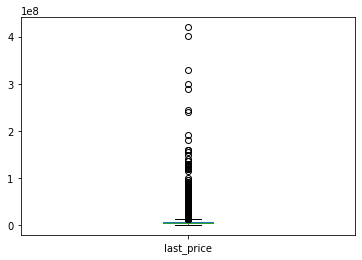

In [50]:
#построим диаграмму рассеяния
data['last_price'].plot(kind='box')
plt.show()

In [51]:
#выведем данные для квартир "без комнат"
data[data['rooms']==0]['last_price'].sort_values(ascending=False).head(10)

Series([], Name: last_price, dtype: float64)

In [52]:
#посмотрим выделяющуюся квартиру 
data.query('rooms==0 & last_price == 71000000.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,categorize_floor


Эта квартира точно может столько стоить, потому что она большая и находится в самом центре Петербурга.

In [53]:
#посмотрим выделяющуюся квартиру
data.query('rooms==0 & last_price == 16300000.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,categorize_floor


Эта квартира тоже стоит своих денег из-за центра, большого потолка и других показателей.

In [54]:
#выведем данные для квартир с 1 комнатой
data[data['rooms']==1]['last_price'].sort_values(ascending=False).head(10)
#здесь выбросов нет

14210    43511000.0
8322     39900000.0
15883    36000000.0
8261     36000000.0
21238    24412900.0
22898    21821800.0
18321    21280000.0
1336     18500000.0
4079     18500000.0
6293     17800000.0
Name: last_price, dtype: float64

In [55]:
#выведем данные для квартир с 2 комнатами
data[data['rooms']==2]['last_price'].sort_values(ascending=False).head(10)

22831    289238400.0
5232      77612080.0
16797     65850000.0
13685     55845000.0
1944      55800000.0
7726      50000000.0
11492     46424072.0
3056      45900000.0
6127      40000000.0
263       39900000.0
Name: last_price, dtype: float64

In [56]:
#посмотрим выделяющуюся квартиру
data.query('rooms==2 & last_price == 289238400.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,categorize_floor
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,181.0,29493.0,29312.0,высокий,1.0,1,3,19,2019,последний


Эта квартира тоже стоит своих денег из-за центра, большой площади и других показателей.

In [57]:
#выведем данные для квартир с 3 комнатами
data[data['rooms']==3]['last_price'].sort_values(ascending=False).head(10)

1436     330000000.0
8900     190870000.0
17912    135000000.0
16647    122000000.0
11430     85000000.0
20215     85000000.0
10362     83820000.0
16239     82400000.0
6462      82000000.0
14496     77000000.0
Name: last_price, dtype: float64

In [58]:
#посмотрим выделяющуюся квартиру
data.query('rooms==3 & last_price == 330000000.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,categorize_floor
1436,19,330000000.0,190.0,2018-04-04,3,3.5,7.0,95.0,5,False,...,181.0,29493.0,29312.0,высокий,1.0,2,4,4,2018,другой


Эта квартира тоже стоит своих денег из-за центра, большой площади и других показателей.

In [59]:
#выведем данные для квартир с 4 комнатами
data[data['rooms']==4]['last_price'].sort_values(ascending=False).head(10)
#здесь выбросов нет

2536     159984000.0
16495    159000000.0
793      135000000.0
1928     125000000.0
20349    124480000.0
21023    124350000.0
4996     124000000.0
20264    119000000.0
492       95000000.0
15701     83000000.0
Name: last_price, dtype: float64

In [60]:
#выведем данные для квартир с 5 комнатами
data[data['rooms']==5]['last_price'].sort_values(ascending=False).head(10)

14706    401300000.0
19155    160000000.0
1026     155000000.0
22229    148000000.0
7543     130000000.0
1300     120000000.0
21923    115490000.0
6621      99000000.0
11329     95000000.0
22494     91075000.0
Name: last_price, dtype: float64

In [61]:
#посмотрим выделяющуюся квартиру
data.query('rooms==5 & last_price == 401300000.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,categorize_floor
14706,15,401300000.0,401.0,2016-02-20,5,2.7,9.0,204.0,9,False,...,181.0,29493.0,29312.0,unknow,2.0,5,2,20,2016,последний


В целом это может быть и выброс, но я оставлю эту квартиру, потому что у неё хорошие показатели и она правда может так стоить из-за неизвестных нам показателей.

In [62]:
#посмотрим обычную следующую квартиру
data.query('rooms==5 & last_price == 160000000.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,categorize_floor
19155,20,160000000.0,243.0,2018-11-12,5,2.7,5.0,145.0,4,False,...,181.0,29493.0,29312.0,unknow,0.0,0,11,12,2018,другой


In [63]:
#выведем данные для квартир с 6 комнатами
data[data['rooms']==6]['last_price'].sort_values(ascending=False).head(10)
#здесь выбросов нет

16461    245000000.0
13749    240000000.0
13864    130000000.0
1188     118000000.0
509       90000000.0
11560     79339000.0
6813      79000000.0
464       66571000.0
8038      64500000.0
1808      59914124.0
Name: last_price, dtype: float64

In [64]:
#выведем данные для квартир с 7 комнатами
data[data['rooms']==7]['last_price'].sort_values(ascending=False).head(10)

15651    300000000.0
12859    140000000.0
21955    130000000.0
12401     91500000.0
6460      82000000.0
1494      65000000.0
6728      55000000.0
10294     52000000.0
4237      50000000.0
660       49950000.0
Name: last_price, dtype: float64

In [65]:
#посмотрим выделяющуюся квартиру
data.query('rooms==7 & last_price == 763000000.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,min,max,diametr_city,categorize_ceiling_height,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,categorize_floor


Скорее всего ошиблись в порядке, поэтому заменим стоимость

In [66]:
#Изменим порядок
data['last_price'] = data['last_price'].replace(763000000.0, 76300000.0)

In [67]:
#выведем данные для квартир с 8 комнатами
data[data['rooms']==8]['last_price'].sort_values(ascending=False)

19865    180000000.0
21990     68000000.0
10569     36900000.0
17203     35300000.0
4435      22190000.0
12447     19900000.0
813       16500000.0
8758      16100000.0
18945     15800000.0
Name: last_price, dtype: float64

Скорее всего ошиблись в порядке, поэтому заменим стоимость

In [68]:
#Изменим порядок
data['last_price'] = data['last_price'].replace(180000000.0, 18000000.0)
data['last_price'] = data['last_price'].replace(150000000.0, 15000000.0)


In [69]:
#выведем данные для квартир с 9 комнатами
data[data['rooms']==9]['last_price'].sort_values(ascending=False)
#здесь выбросов нет

15151    88000000.0
8822     49968900.0
16915    29000000.0
20791    24000000.0
9550     23500000.0
13019    22250000.0
13397    19500000.0
Name: last_price, dtype: float64

Для следующих квартир слишком маленькая выборка. Буквально не с чем сравнить, квартиры реально могут столько стоить

In [70]:
#выведем данные для квартир с 10 комнатами
data[data['rooms']==10]['last_price'].sort_values(ascending=False)

18891    40000000.0
4149     23000000.0
18119    15500000.0
Name: last_price, dtype: float64

In [71]:
#выведем данные для квартир с 11 комнатами
data[data['rooms']==11]['last_price'].sort_values(ascending=False)


9688    33000000.0
648     17500000.0
Name: last_price, dtype: float64

In [72]:
#выведем данные для квартир с 12 комнатами
data[data['rooms']==12]['last_price'].sort_values(ascending=False)


19540    420000000.0
Name: last_price, dtype: float64

In [73]:
#выведем данные для квартир с 14 комнатами
data[data['rooms']==14]['last_price'].sort_values(ascending=False)

20829    28659000.0
866      25000000.0
Name: last_price, dtype: float64

In [74]:
#выведем данные для квартир с 15 комнатами
data[data['rooms']==15]['last_price'].sort_values(ascending=False)


5358    65000000.0
Name: last_price, dtype: float64

Эта квартира кажется очень дорогой, выбивается из тенденции роста цен, но она одна с такими показателями комнат, поэтому сравнить не с чем

In [75]:
#выведем данные для квартир с 16 комнатами
data[data['rooms']==16]['last_price'].sort_values(ascending=False)


18848    28500000.0
Name: last_price, dtype: float64

In [76]:
#выведем данные для квартир с 19 комнатами
data[data['rooms']==19]['last_price'].sort_values(ascending=False)


14498    32250000.0
Name: last_price, dtype: float64

Добавим вспомогательный столбец: цена одного квадратного метра, который рассчитывается делением общей цены (last_price) на общую площадь (total_area)

In [77]:
#добавление нового столбца с ценой квадратного метра
data['price_one_area'] = data['last_price']/data['total_area']

### Поработаем с total_images — число фотографий квартиры в объявлении

Пропусков здесь нет, проверим аномалии

In [78]:
#получим список уникальных значений
data['total_images'].unique()

array([20,  7, 10,  2,  6, 18,  5,  9,  1, 16, 11,  8, 12, 13,  3, 15, 17,
       14,  0, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Тут всё ок, все количества фото вполне реальны

### Проверим предобрабтку данных

In [79]:
#посмотрим общую информацию о данных, проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20931 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               20931 non-null  int64         
 1   last_price                 20931 non-null  float64       
 2   total_area                 20931 non-null  float64       
 3   first_day_exposition       20931 non-null  datetime64[ns]
 4   rooms                      20931 non-null  int64         
 5   ceiling_height             20858 non-null  float64       
 6   floors_total               20931 non-null  float64       
 7   living_area                20931 non-null  float64       
 8   floor                      20931 non-null  int64         
 9   is_apartment               20931 non-null  bool          
 10  studio                     20931 non-null  bool          
 11  open_plan                  20931 non-null  bool          
 12  kitc

In [80]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


**Вывод**

В данном разделе была проведена первичная обработка данных. Проанализированы и заполнены пропуски. Удалены аномалии, данные приведены к нужному типу и готовы к исследовательскому анализу данных.

## Исследовательский анализ данных

### Построим гистограммы для основных показателей

#### Построим гистограмму для общей площади

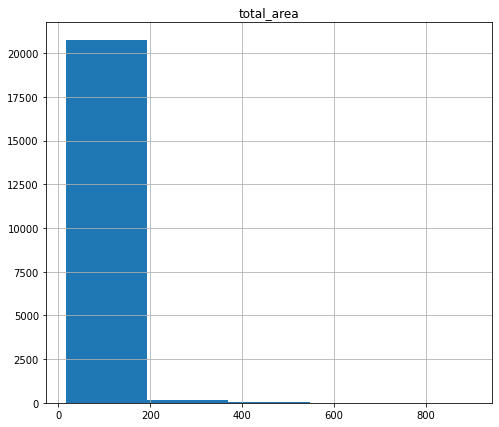

In [81]:
data.hist('total_area', bins= 5, figsize=(8, 7))
plt.show()

По гистограмме видно, что основная часть квартир - это квартиры до 200 квадратов. Посмотрим распределение для квартир площадью менее 200 квадратов

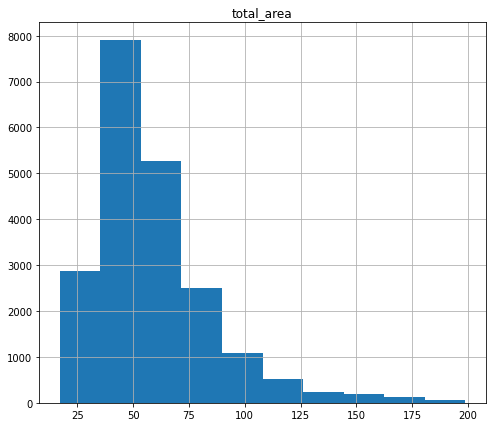

In [82]:
data.query('total_area < 200').hist('total_area', figsize=(8, 7))
plt.show()

По гистограмме видно, что большинство продаваемых квартир площадью примерно **до 100 квадратов**

#### Построим гистограмму для площади кухни

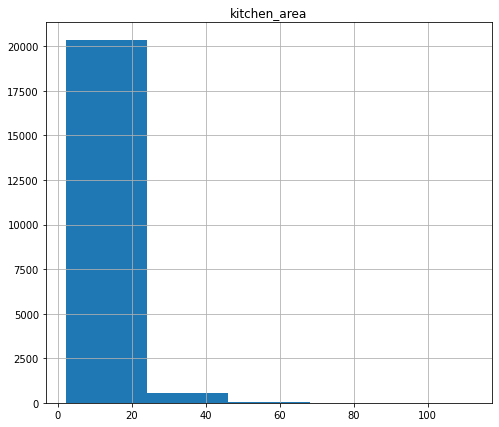

In [83]:
data.hist('kitchen_area', bins= 5, figsize=(8, 7))
plt.show()

По гистограмме видно, что основная часть квартир - это квартиры с площадью кухни до 25 квадратов. Посмотрим распределение для квартир с кухней площадью менее 25 квадратов

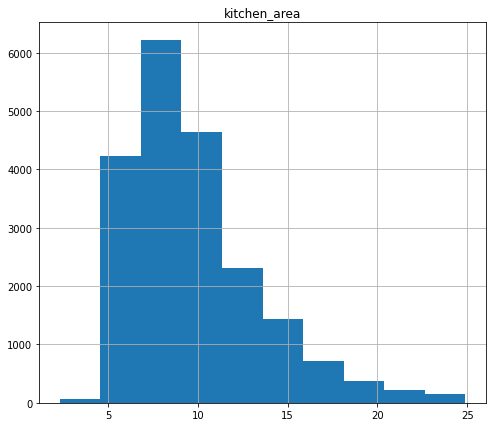

In [84]:
data.query('kitchen_area < 25').hist('kitchen_area', figsize=(8, 7))
plt.show()

По гистограмме видно, что большинство квартир - это квартиры с кухней **от 4 до 15 квадратов.**

#### Построим гистограмму для цены объекта

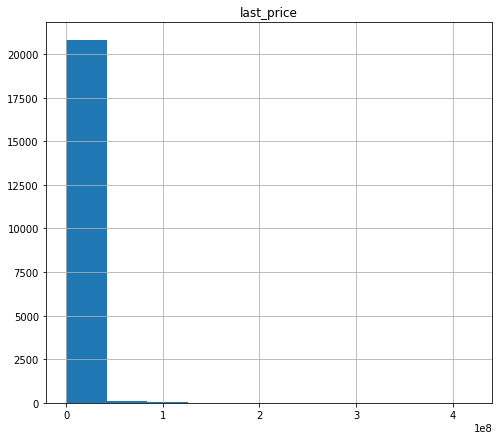

In [85]:
data.hist('last_price', bins= 10, figsize=(8, 7))
plt.show()

По гистограмме видно, что основная часть квартир - это квартиры со стоимостью до 50млн. Посмотрим распределение для квартир  со стоимостью до 50млн

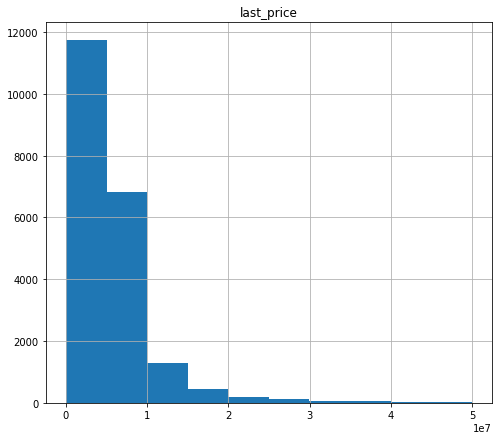

In [86]:

data.query('last_price < 50000000').hist('last_price', figsize=(8, 7))
plt.show()

Видно, что основная часть квартир приходится на стоимость **менее 10млн**

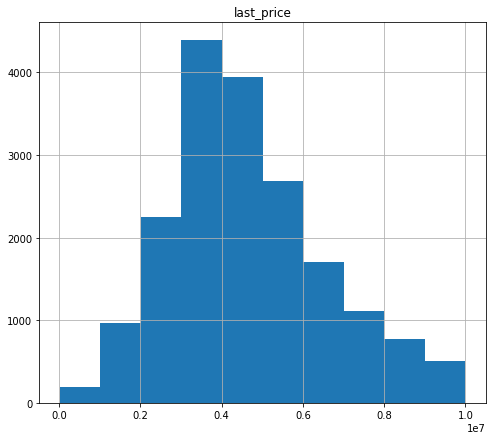

In [87]:
#построим гистограмму для квартир стоимостью менее 10млн
data.query('last_price < 10000000').hist('last_price', figsize=(8, 7))
plt.show()

Наиболее частовстречаемая стоимость квартир примерно 3-5 млн

#### Построим гистограмму для количества комнат

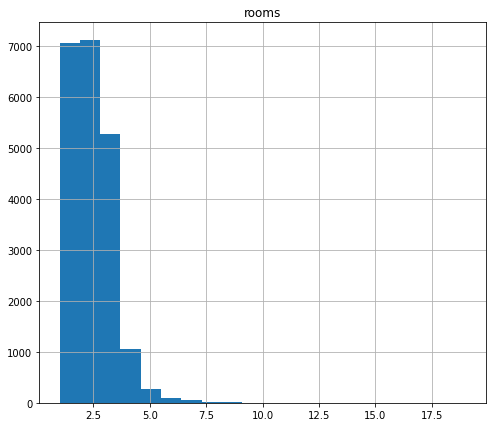

In [88]:
data.hist('rooms', bins= 20, figsize=(8, 7))
plt.show()

Видно, что нужно смотреть квартиры с количеством комнат до 6 штук

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

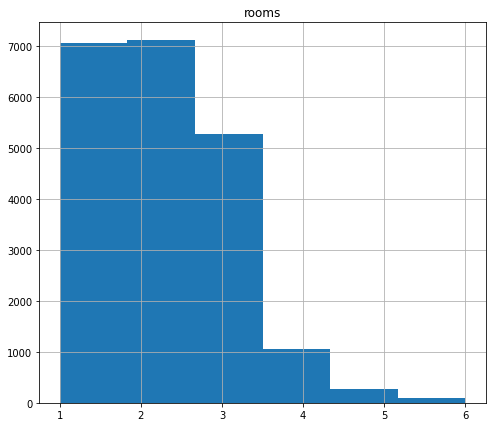

In [89]:
data.query('rooms <= 6').hist('rooms', bins=6, figsize=(8, 7))


Основная часть квартир **с 1-4 комнатами**

#### Построим гистограмму для высоты потолков

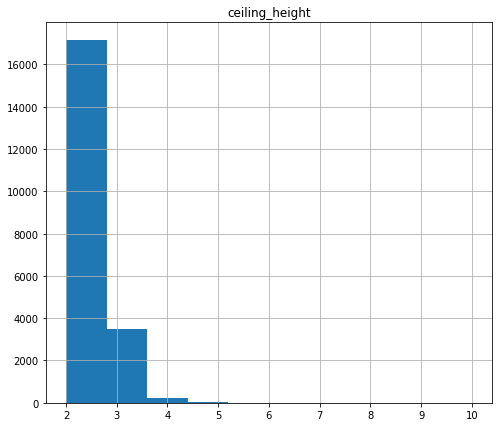

In [90]:
data.hist('ceiling_height', bins= 10, figsize=(8, 7))
plt.show()

Нельзя выделить чёткое распределение по высоте потолка. Но наиболее часто встречаются квартиры с потолками около 2.5 метров

#### Построим гистограмму для этажей квартир

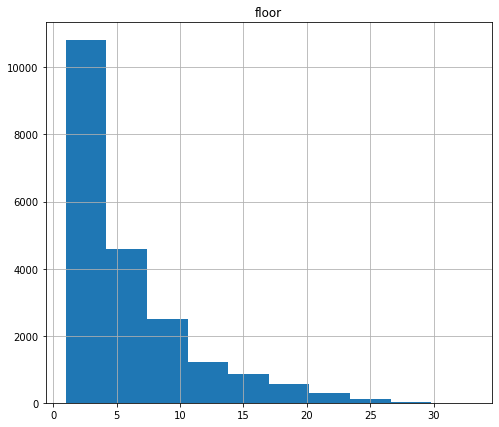

In [91]:
data.hist('floor', bins= 10, figsize=(8, 7))
plt.show()

Посмотрим детально гистограмму для квартир с квартирами менее, чем на 20 этаже.

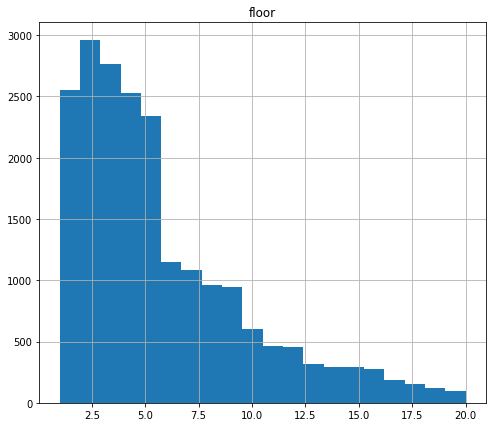

In [92]:
data.query('floor <= 20').hist('floor', bins=20, figsize=(8, 7))
plt.show()

Основная часть квартир приходится на **1-6 этажи**

#### Построим гистограмму для типов этажей квартир («первый», «последний», «другой»)

In [93]:
#посчитаем, сколько квартир в какой категории
data.groupby('categorize_floor')['categorize_floor'].count()

categorize_floor
другой       15383
первый        2556
последний     2992
Name: categorize_floor, dtype: int64

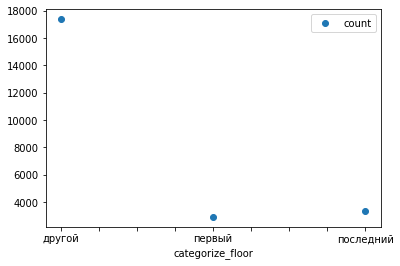

In [94]:
#создадим новый датафрейм 
categorize_floor = pd.DataFrame({
    'categorize_floor': ['другой', 'первый', 'последний'],
    'count': [17363, 2917, 3336]
   
})

#построим график для наглядности
categorize_floor.plot(x='categorize_floor',y='count',style='o')
plt.show()

Видно, что наиболее часто встречаются квартиры с **"другим"** этажом, то есть не первым, не последним

<AxesSubplot:>

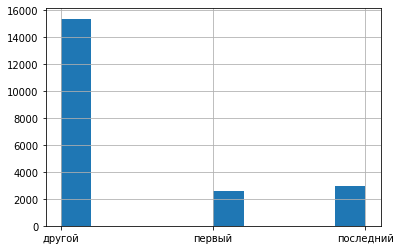

In [95]:
data['categorize_floor'].hist()

#### Построим гистограмму для общего количества этажей в доме

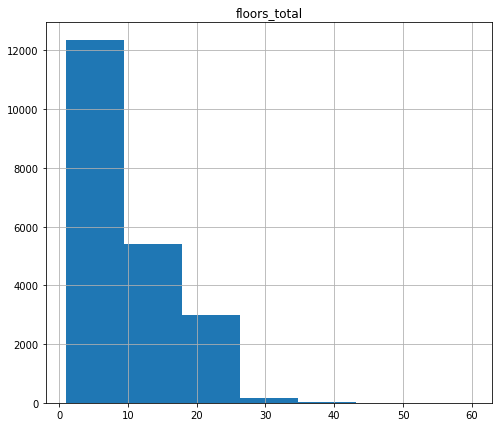

In [96]:
data.hist('floors_total', bins= 7, figsize=(8, 7))
plt.show()

Посмотрим детально гистограмму для квартир в домах с общим количеством этажей до 25

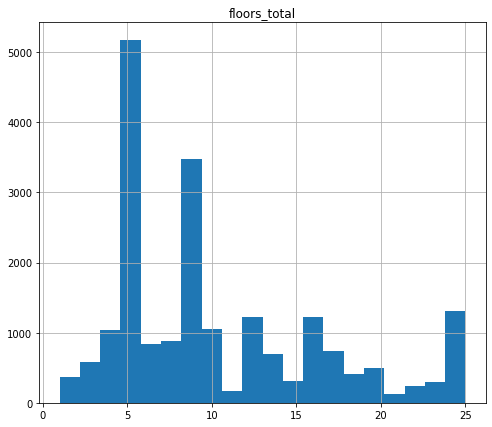

In [97]:
data.query('floors_total <= 25').hist('floors_total', bins=20, figsize=(8, 7))
plt.show()

Наиболее часто встречаемые квартиры высотой до 25 этажей. Часто встречаются 5- и 9-этажные дома

#### Построим гистограмму для расстояния до центра города в метрах

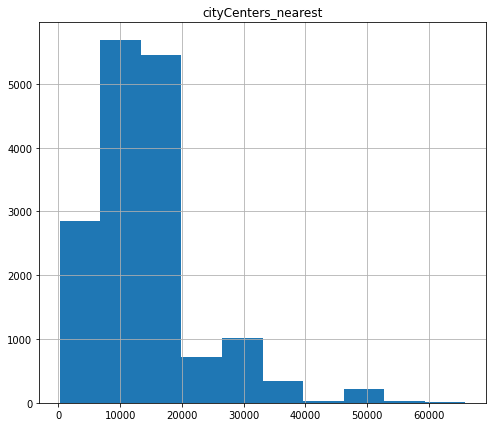

In [98]:
data.hist('cityCenters_nearest', bins= 10, figsize=(8, 7))
plt.show()

Посмотрим детально гистограмму для квартир c расстоянием до 20000м

Наибольшее количество квартир находится в черте **20км** от города

#### Построим гистограмму для расстояния до ближайшего аэропорта

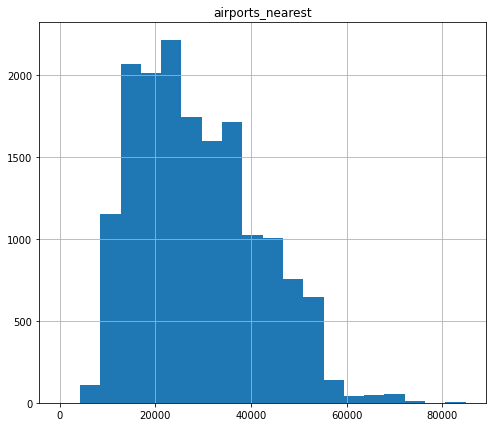

In [99]:
data.hist('airports_nearest', bins= 20, figsize=(8, 7))
plt.show()

У наибольшего количества квартир расстояние до аэропорта от **10 до 40км**

#### Построим гистограмму для расстояния до ближайшего парка

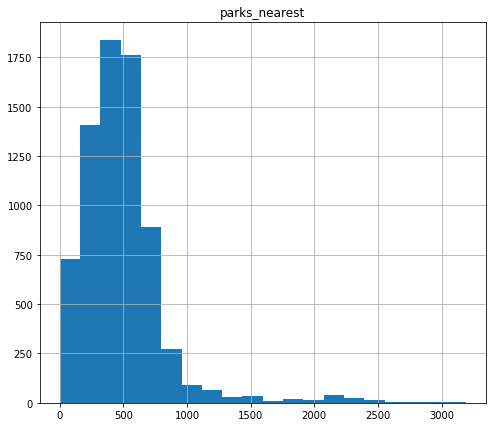

In [100]:
data.hist('parks_nearest', bins= 20, figsize=(8, 7))
plt.show()

Посмотрим детально гистограмму для квартир c расстоянием до парка 1000м

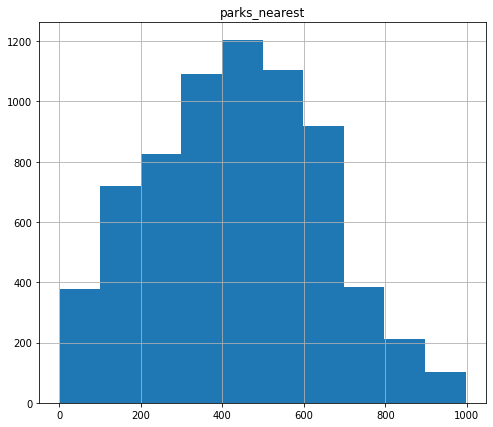

In [101]:
data.query('parks_nearest <= 1000').hist('parks_nearest', bins=10, figsize=(8, 7))
plt.show()

У большинства квартир расстояние до парка около 400-800м

#### Построим гистограммы для дня и месяца публикации объявления 

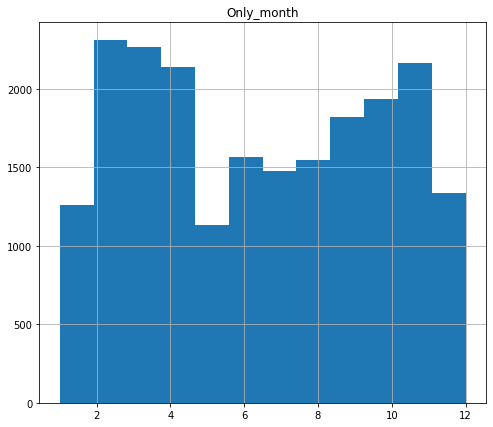

In [102]:
#гистограмма для месяцев
data.hist('Only_month', bins= 12, figsize=(8, 7))
plt.show()

Видим, что в феврале, марте, апреле и ноябре выставляется наибольшее количество квартир

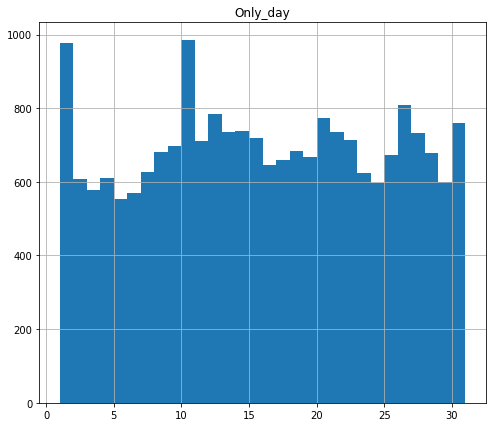

In [103]:
#для дней
data.hist('Only_day', bins= 30, figsize=(8, 7))
plt.show()

Чаще всего выставляют квартиры 1-го и 10-го числа

#### Построим гистограммы для дня недели публикации объявления

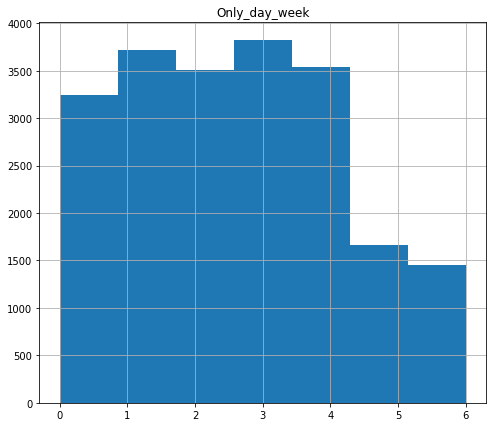

In [104]:
data.hist('Only_day_week', bins= 7, figsize=(8, 7))
plt.show()

Чаще всего выставляют квартиры на продажу по будням.

### Изучим, как быстро продавались квартиры. 

Этот параметр показывает, сколько дней было размещено каждое объявление.


Построим гистограмму

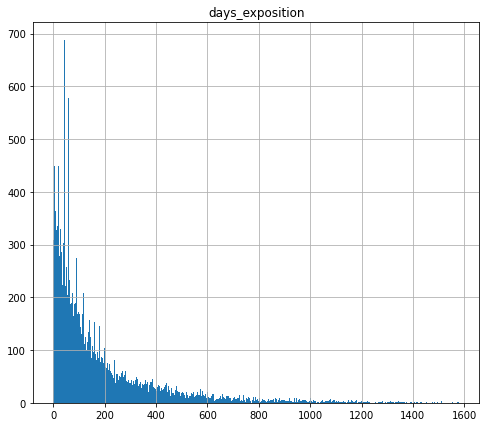

In [105]:
data.hist('days_exposition', bins= 500, figsize=(8, 7))
plt.show()

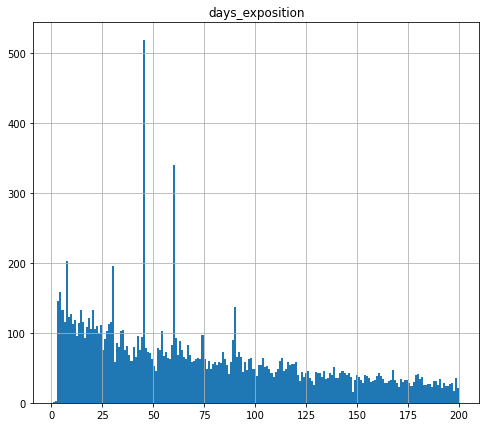

In [106]:
#Посмотрим на наиболее встречаемые данные поближе
data.query('days_exposition <= 200').hist('days_exposition', bins=200, figsize=(8, 7))
plt.show()

Посчитаем среднее и медиану

In [107]:
data['days_exposition'].mean()

185.7082455945916

In [108]:
data['days_exposition'].median()

102.0

In [109]:
data['days_exposition'].describe()

count    18046.000000
mean       185.708246
std        222.054471
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

Гистограмма имеет форму экспоненты. Экспоненциально идет уменьшение количества квартир с увеличением времени продажи. 

Есть отдельные пики продаваемости на примерно 45, 60 и 90 дни продажи. 

**Среднее время продажи до 95 дней**. 
Необычайно быстрыми можно считать продажи до 45 дней. Таких квартир примерно 25%.

Необычайно долгими можно считать продажи квартир более 300-350 дней. Это примерная сумма среднего времени продажи и стандартного отклонения. Также, больше 75% квартир продаются до 300 дней.


### Изучим факторы, которые больше всего влияют на общую (полную) стоимость объекта

Изучим, зависит ли цена от:

общей площади;

жилой площади;

площади кухни;

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией используем сводные таблицы.

#### Изучим, зависит ли цена от общей площади

In [110]:
factor_price_for_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median')
factor_price_for_area

,last_price
total_area,
17.0,1900000.0
18.0,770000.0
18.4,2200000.0
20.0,2975000.0
20.3,2740000.0
...,...
517.0,50000000.0
590.0,65000000.0
618.0,300000000.0


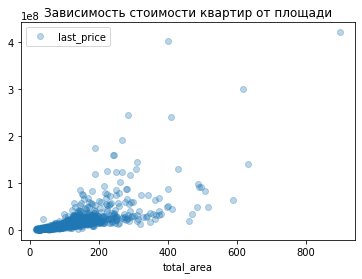

In [111]:
factor_price_for_area.plot(title='Зависимость стоимости квартир от площади', style='o',alpha=0.3)
plt.show()

Есть тенденция к линейному росту, но также есть большие выбросы. По гистограмме видно, что большая часть квартир до 100 квадратов. 

Посмотрим зависимость

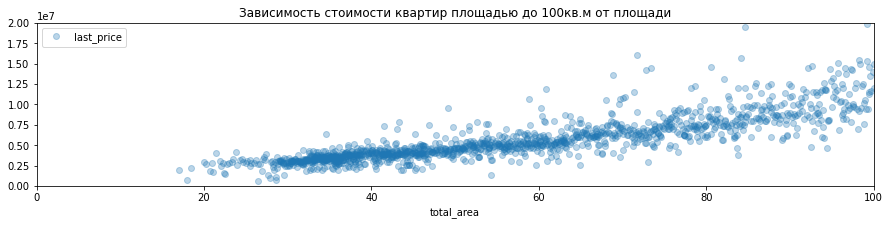

In [112]:
factor_price_for_area.plot(title='Зависимость стоимости квартир площадью до 100кв.м от площади', style='o', xlim=(0, 100),ylim=(0,20000000), figsize=(15, 3),alpha=0.3)
plt.show()

Посмотрим коэфициент корреляции для общей площади и цены для всех данных и для квартир с площадью до 100 квадратных метров

In [113]:
print(data['total_area'].corr(data['last_price']))
print(data.query('total_area < 100')['total_area'].corr(data['last_price']))

0.6898976774026025
0.6539738769480198


Для обычных квартир, которых большинство, есть зависимость между стоимостью и площадью. Чем больше квартира, тем больше она стоит. Однако стоит учитывать и другие факторы, влияющие на ценообразование.

#### Изучим, зависит ли цена от площади кухни

In [114]:
factor_price_for_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
factor_price_for_kitchen_area

,last_price
kitchen_area,
2.30,2940000.0
2.40,2200000.0
2.89,5967734.0
3.00,3180000.0
3.20,6000000.0
...,...
93.20,82400000.0
100.00,65000000.0
100.70,12500000.0


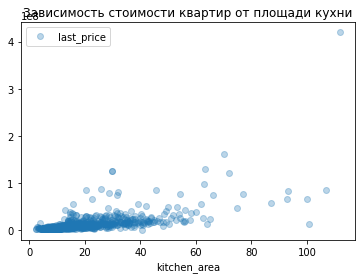

In [115]:
factor_price_for_kitchen_area.plot(title='Зависимость стоимости квартир от площади кухни', style='o', alpha=0.3)
plt.show()

У большинства кухонь площадь до 15 кв.м.(из гистограммы). Расммотрим зависимость поближе:

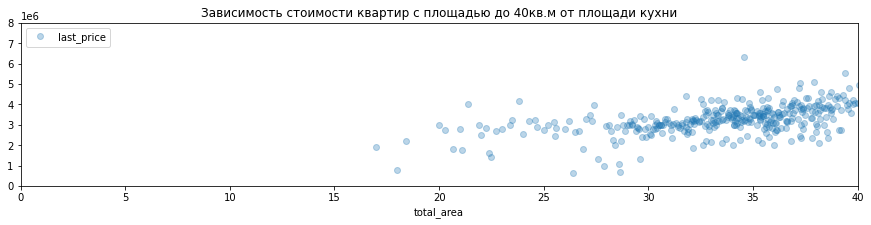

In [116]:
factor_price_for_area.plot(title='Зависимость стоимости квартир с площадью до 40кв.м от площади кухни', style='o', xlim=(0, 40),ylim=(0,8000000), figsize=(15, 3), alpha=0.3)
plt.show()

Посмотрим коэфициент корреляции для площади кухни и цены для всех квартир и самых распространенных квартир

In [117]:
print(data['kitchen_area'].corr(data['last_price']))
print(data.query('kitchen_area < 40')['kitchen_area'].corr(data['last_price']))

0.5171906428099565
0.46171453520203243


Корреляция для всех квартир и для наиболее частых квартир(то есть с кухней до 40 кв.м.) говорит о наличии связи, однако не слишком сильной. Выходит, увеличение площади кухни сопровождается прибавкой в стоимости

#### Изучим, зависит ли цена от жилой площади

In [118]:
factor_price_for_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median')
factor_price_for_living_area

,last_price
living_area,
6.0,3799000.0
6.5,4050000.0
8.0,6850000.0
8.3,4000000.0
8.4,4200000.0
...,...
322.3,140000000.0
332.0,50000000.0
347.5,91500000.0


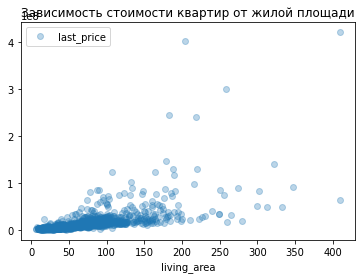

In [119]:
factor_price_for_living_area.plot(title='Зависимость стоимости квартир от жилой площади', style='o', alpha=0.3)
plt.show()

Увеличим график:

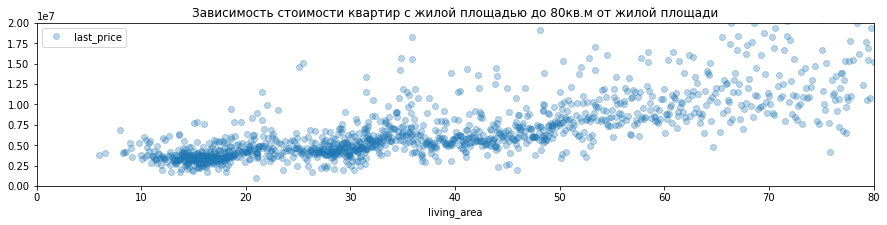

In [120]:
factor_price_for_living_area.plot(title='Зависимость стоимости квартир с жилой площадью до 80кв.м от жилой площади', style='o', xlim=(0, 80),ylim=(0,20000000), figsize=(15, 3), alpha=0.3)
plt.show()

Посмотрим корреляцию между жилой площадью  и стоимостью квартиры со всеми квартирами и наиболее часто встречающимися

In [121]:
print(data['living_area'].corr(data['last_price']))
print(data.query('living_area < 80')['living_area'].corr(data['last_price']))

0.6004985099596865
0.48702602600290523


Корреляция для всех квартир и для наиболее частых квартир(то есть с жилой площадью до 80 кв.м.) говорит о наличии связи, однако не слишком сильной. Выходит, увеличение жилой площади сопровождается прибавкой в стоимости

#### Изучим, зависит ли цена от количества комнат

In [122]:
factor_price_for_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
factor_price_for_rooms

,last_price
rooms,
1,3600000.0
2,4790000.0
3,6200000.0
4,9000000.0
5,14000000.0
6,19000000.0
7,24000000.0
8,19900000.0
9,24000000.0


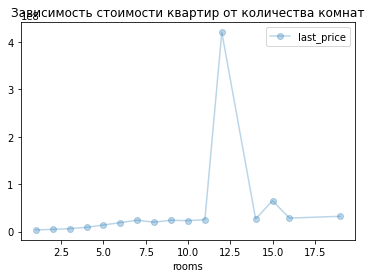

In [123]:
factor_price_for_rooms.plot(title='Зависимость стоимости квартир от количества комнат', style='o-', alpha=0.3)
plt.show()

Укрупним график

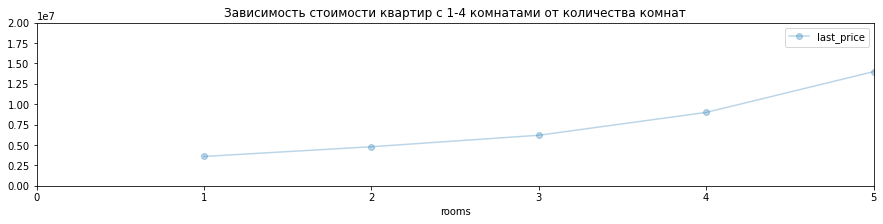

In [124]:
factor_price_for_rooms.plot(title='Зависимость стоимости квартир с 1-4 комнатами от количества комнат', style='o-', xlim=(0, 5),ylim=(0,20000000), figsize=(15, 3), alpha=0.3)
plt.show()

Посмотрим корреляции для всех квартир и для наиболее частых квартир

In [125]:
print(data['rooms'].corr(data['last_price']))
print(data.query('rooms < 5')['rooms'].corr(data['last_price']))

0.38945669932161003
0.330692485720619


Корреляция для всех квартир и для наиболее частых квартир(то есть с 1-4 комнатами) говорит о наличии связи, однако не слишком сильной. Выходит, увеличение количества комнат сопровождается прибавкой в стоимости

#### Изучим, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)

In [126]:
factor_price_for_categorize_floor = data.pivot_table(index='categorize_floor', values='last_price', aggfunc='median')
factor_price_for_categorize_floor

,last_price
categorize_floor,
другой,4900000.0
первый,3950000.0
последний,4350000.0


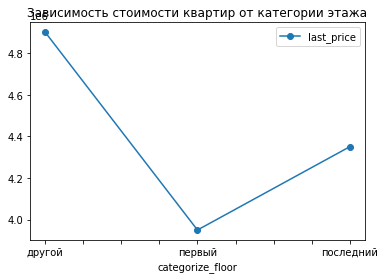

In [127]:
factor_price_for_categorize_floor.plot(title='Зависимость стоимости квартир от категории этажа', style='o-', alpha=1)
plt.show()

По графику видно, что квартиры с первыми и последними этажами дешевле, чем с другими. При этом квартиры на первом этаже самые дешевые.

#### Изучим, зависит ли цена от даты размещения (день недели, месяц, год)

In [128]:
factor_price_for_only_day_week = data.pivot_table(index='Only_day_week', values='last_price', aggfunc='median')
factor_price_for_only_day_week

,last_price
Only_day_week,
0,4700000.0
1,4768714.0
2,4750000.0
3,4700000.0
4,4600000.0
5,4600000.0
6,4600000.0


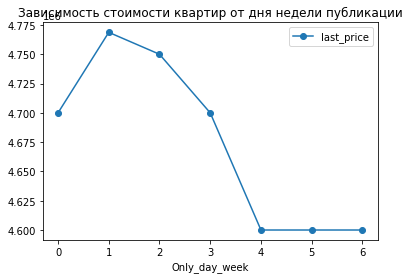

In [129]:
factor_price_for_only_day_week.plot(title='Зависимость стоимости квартир от дня недели публикации', style='o-', alpha=1)
plt.show()

Стоимость квартиры больше, если объявление публикуется в начале недели. По графику видно отрицательный коэффициент, если не брать первый день недели. То есть при приближении к концу недели стоимость становится меньше.

Посмотрим распределение по месяцам

In [130]:
factor_price_for_only_month = data.pivot_table(index='Only_month', values='last_price', aggfunc='median')
factor_price_for_only_month

,last_price
Only_month,
1,4650000.0
2,4700000.0
3,4700000.0
4,4800227.0
5,4580000.0
6,4490000.0
7,4650000.0
8,4600000.0
9,4740000.0


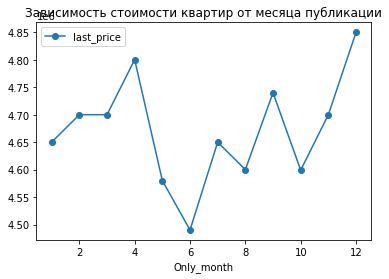

In [131]:
factor_price_for_only_month.plot(title='Зависимость стоимости квартир от месяца публикации', style='o-', alpha=1)
plt.show()

Корреляция отсутсвует, данный граффик неинформативен для оценки. Меньше всего квартиры стоят в мае-июне, а больше всего в апреле.

Посмотрим распределение по годам

In [132]:
factor_price_for_only_year = data.pivot_table(index='Only_Year', values='last_price', aggfunc='median')
factor_price_for_only_year

,last_price
Only_Year,
2014,7640000.0
2015,5250000.0
2016,4550000.0
2017,4550000.0
2018,4650000.0
2019,5080000.0


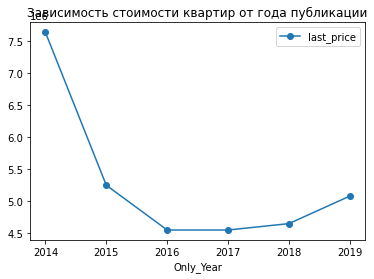

In [133]:
factor_price_for_only_year.plot(title='Зависимость стоимости квартир от года публикации', style='o-', alpha=1)
plt.show()

In [134]:
#посмотрим распределение площади по годам
data.pivot_table(index='Only_Year', values='total_area', aggfunc='median')


,total_area
Only_Year,
2014,77.78
2015,60.00
2016,54.00
2017,52.00
2018,51.00
2019,52.00


Действительно, средняя площадь продаваемых квартир падала примерно также, как и средняя стоимость.Таким образом еще раз подтверждается, что основной ценообразующий параметр - площадь, что подтверждается распределением стоимости квартир по годам.

#### Создадим датафрейм с наиболее часто встречающимися квартирами

Общая площадь больше всего влияет на стоимость. Корреляция с общей площадью наибольшая.

In [135]:
data_often = data[data['total_area'] < 200]

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [136]:
data.groupby('locality_name_correct').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name_correct,,
санкт-петербург,14025,5500000.0
поселок мурино,430,3500000.0
поселок шушары,392,3950000.0
всеволожск,357,3450000.0
пушкин,337,5200000.0
колпино,322,3600000.0
гатчина,290,3085000.0
поселок парголово,288,4115000.0
деревня кудрово,226,3815000.0


In [137]:
data.groupby('locality_name_correct').median()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,min,max,diametr_city,city_centers_nearest_norm,Only_day_week,Only_month,Only_day,Only_Year,price_one_area
locality_name_correct,,,,,,,,,,,,,,,,,,,,,
unknow,7.5,5115296.5,62.70,2.0,2.875,5.5,35.9,3.0,False,False,...,223.0,0.0,0.0,0.0,8.0,3.0,5.5,19.5,2016.0,90047.653959
бокситогорск,7.5,740000.0,46.05,2.0,3.900,5.0,29.5,2.5,False,False,...,56.5,0.0,0.0,0.0,NaN,4.0,5.0,15.0,2018.0,16095.667299
волосово,6.0,1800000.0,47.10,2.0,2.500,5.0,29.8,2.0,False,False,...,135.5,0.0,0.0,0.0,NaN,3.0,6.0,12.0,2017.0,39812.646370
волхов,8.0,1560000.0,48.00,2.0,2.580,5.0,30.6,3.0,False,False,...,111.0,0.0,0.0,0.0,NaN,2.0,5.0,17.0,2018.0,34853.420195
всеволожск,10.0,3450000.0,53.50,2.0,2.700,9.0,30.0,4.0,False,False,...,137.0,0.0,0.0,0.0,NaN,2.0,7.0,14.0,2018.0,65789.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
сосновый бор,15.0,3650000.0,49.20,2.0,2.500,9.0,30.0,4.0,False,False,...,60.0,0.0,0.0,0.0,NaN,2.0,4.0,15.0,2018.0,75085.324232
сясьстрой,12.5,1495000.0,46.65,2.0,2.550,5.0,31.0,3.5,False,False,...,149.0,0.0,0.0,0.0,NaN,3.0,4.5,12.5,2018.0,33877.354538
тихвин,6.0,1750000.0,48.00,2.0,2.600,5.0,28.0,4.0,False,False,...,50.0,0.0,0.0,0.0,NaN,2.0,7.0,16.0,2018.0,40059.347181


In [138]:
#найдём 10 наиболее часто встречающихся населенных пункта
data['locality_name_correct'].value_counts().head(10)

санкт-петербург      14025
поселок мурино         430
поселок шушары         392
всеволожск             357
пушкин                 337
колпино                322
гатчина                290
поселок парголово      288
деревня кудрово        226
выборг                 190
Name: locality_name_correct, dtype: int64

In [139]:
#посчитаем медианы стоимости квадратного метра в каждом населенном пункте
print(data[data['locality_name_correct'] == 'санкт-петербург']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'поселок мурино']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'поселок шушары']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'всеволожск']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'пушкин']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'колпино']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'поселок парголово']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'гатчина']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'деревня кудрово']['price_one_area'].median())
print(data[data['locality_name_correct'] == 'выборг']['price_one_area'].median())

104197.90104947526
84922.64660493827
77223.32015810277
65789.47368421052
100000.0
74723.74847374848
92271.97802197802
67746.28608237047
91715.11627906977
58357.385976855


In [140]:
#создадим датафрейм с назвниями и медианами
price_one_area_min_max = pd.DataFrame({
    'locality_name': ['санкт-петербург', 'поселок мурино' , 'поселок шушары', 'всеволожск', 'пушкин', 'колпино', 'поселок парголово', 'гатчина', 'деревня кудрово', 'выборг'],
    'price_one_area': [104761.90476190476, 85878.46216880633, 76876.17260787993, 65789.47368421052, 100000.0, 74723.74847374848, 91642.85714285714, 67796.61016949153, 91860.46511627907, 58158.31987075929]
   
})

In [141]:
#расположим в порядке убывания по стоимости
price_one_area_min_max.sort_values('price_one_area', ascending=False)

,locality_name,price_one_area
0,санкт-петербург,104761.904762
4,пушкин,100000.000000
8,деревня кудрово,91860.465116
6,поселок парголово,91642.857143
1,поселок мурино,85878.462169
2,поселок шушары,76876.172608
5,колпино,74723.748474
7,гатчина,67796.610169
3,всеволожск,65789.473684
9,выборг,58158.319871


В наиболее частых населенных пунктах самые дорогие квартиры в Санкт-Петербурге, а самые дешёвые в Выборге.

### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 

In [142]:
#выделим датафрейм только с квартирами в Петербурге
data_piter = data[data['locality_name_correct'] == 'санкт-петербург']

#сделаем сводную таблицу для расстояния до центра и средней стоимостью за квадратный метр
data_piter.pivot_table(index='city_centers_nearest_norm', values='price_one_area', aggfunc='median')


,price_one_area
city_centers_nearest_norm,
0.0,138536.993745
1.0,123775.923905
2.0,116280.409731
3.0,108613.127647
4.0,124390.243902
5.0,125530.516854
6.0,129032.258065
7.0,125071.225071
8.0,113386.603790


In [143]:
#создадим датафрейм с этими данными
price_one_area_from_city_centers_nearest_norm = pd.DataFrame({

    'price_one_area': [138536.993745, 123966.942149, 116363.636364, 110013.927577, 126086.956522, 125799.573561, 133950.410454, 125000.000000, 114137.691630, 105317.631653, 105656.224406, 103225.806452, 103921.568627, 104296.109765, 102473.475994, 98571.428571, 97727.272727, 91494.687763, 93208.824996, 93736.699116, 107021.728060, 88288.288288, 85106.382979, 90590.807070, 86133.031750, 90163.934426, 56521.739130, 132115.709459, 79631.201905, 56976.744186]

})

#отсортируем значения по убыванию
price_one_area_from_city_centers_nearest_norm.sort_values('price_one_area', ascending=False)

,price_one_area
0,138536.993745
6,133950.410454
27,132115.709459
4,126086.956522
5,125799.573561
7,125000.000000
1,123966.942149
2,116363.636364
8,114137.691630
3,110013.927577


Видно, что стоимость каждого километра распределяется на линейно. Представим это на графике

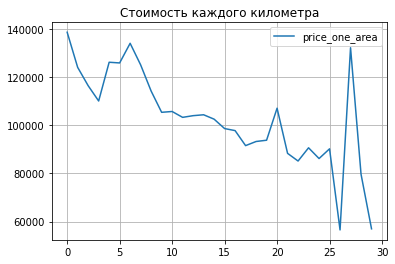

In [144]:
price_one_area_from_city_centers_nearest_norm.plot(grid = True, title = 'Стоимость каждого километра')
plt.show()

В целом видна тенденция к падению стоимости с увеличением. Проверим распределение стоимости по климотерам для квартир до 200кв.м.: сдлеаем аналогичные действия для датафрейма с квартирами до 200кв.м.

In [145]:
data_piter_often = data_often[data_often['locality_name_correct'] == 'санкт-петербург']
data_piter_often.pivot_table(index='city_centers_nearest_norm', values='price_one_area', aggfunc='median')

,price_one_area
city_centers_nearest_norm,
0.0,129777.103173
1.0,123529.411765
2.0,115577.184010
3.0,108176.910299
4.0,124489.239598
5.0,125117.288235
6.0,127582.440544
7.0,125000.000000
8.0,113291.139241


In [146]:
price_one_area_from_city_centers_nearest_norm_2 = pd.DataFrame({

    'price_one_area': [129777.103173,123529.411765,116197.183099,109750.744127,126009.693053,125723.089172,133676.623328,124468.085106, 114035.087719, 105370.370370,105656.224406,103230.090726,104007.225047, 104296.109765,102537.313433,98571.428571,97727.272727,91496.598639,93235.831810, 93736.699116,107021.728060,88288.288288,85106.382979,90590.807070,86133.031750,90163.934426, 56521.739130, 132115.709459,79631.201905,56976.744186]                
})

price_one_area_from_city_centers_nearest_norm_2.sort_values('price_one_area', ascending=False)


,price_one_area
6,133676.623328
27,132115.709459
0,129777.103173
4,126009.693053
5,125723.089172
7,124468.085106
1,123529.411765
2,116197.183099
8,114035.087719
3,109750.744127


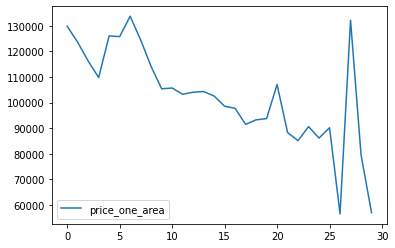

In [147]:
price_one_area_from_city_centers_nearest_norm_2.plot()
plt.show()

## Выводы

Было проведено исследование объявлений о продаже квартир 

Изучены и проанализированы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Определены  параметры, по которым можно построить автоматизированную систему, чтобы оценить рыночную стоимость объектов недвижимости

На **этапе предобработки** были определены и заполнены возможные пропуски в данных, устранены аномалии, дубликаты, выделены особенности полученных данных. Также добавлены новые данные, полученные на основе исходных данных. Проведена категоризация некоторых данных для более удобной оценки параметров.


На **этапе исследовательского анализа данных** были выделены необходимые закономерности и проведены следующие действия:

*1) Построение гистограмм для выявления параметров квартир, которые встречаются чаще всего. Таким образом, чаще всего встречаются квартиры:*

-с площадью до 100кв.м.; 

-с кухней до 15 кв.м.; 

-с ценой 3-5млн; с 1-4 комнатами; 

-с высотой потолков 2,5 метра; 

-на 1-6 этажах; 

-с расстоянием до центра до 20км; 

-с расстоянием до аэропорта от 10 до 40км; 

-с расстоянием до парка 400-800м;   

-выявлено, что большинство квартир выставляется на продажу в в феврале, марте, апреле и ноябре; 

-на 1-ое и 10-ое число месяца также приходится большинство объявлений; 

-объявления выставляются в основном будни. 


*2) Изучение времени продажи квартир.*

-Есть отдельные пики продаваемости на примерно 45, 60 и 90 дни продажи. 

-Среднее время продажи до 95 дней. 

-Необычайно долгими можно считать продажи квартир более 600 дней.
 
 
*3) Изучение факторов, которые влияют на стоимость. Ниже представлены факторы в порядке убывания влияния на стоимость и коэффициент корреляции:*

-общая площадь 0.7

-жилая площадь 0.6

-площадь кухни 0.5

-количество комнат 0.4

-квартиры с первыми и последними этажами дешевле, чем с другими. При этом квартиры на первом этаже самые дешевые.

-стоимость квартиры больше, если объявление публикуется в начале недели. По графику видно отрицательный коэффициент, если не брать первый день недели. То есть при приближении к концу недели стоимость становится меньше.

-меньше всего квартиры стоят в мае-июне, а больше всего в апреле.

-невозможно оценить дальнейшую тенденцию роста цен по годам. В 2014 году был пик стоимости квартир. Дальше стоимость падала экспоненциально до 2017 года. Далее пошел медленный рост.



*4) Изучение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.*

Ниже представлена таблица с ценами за один квадратный метр в 10 населённых пунктах с наибольшим числом объявлений в порядке убывания цены:


санкт-петербург     104761.904762

пушкин              100000.000000

деревня кудрово     91860.465116

поселок парголово   91642.857143

поселок мурино      85878.462169

поселок шушары      76876.172608

колпино             74723.748474

гатчина             67796.610169

всеволожск          65789.473684

выборг              58158.319871



*5) Изучение средней цены каждого км для квартир в Санкт-Петербурге.*

В целом видна тенденция к падению стоимости с увеличением расстояния от центра. Однако есть отдельные “дорогие” километры. Однако эта особенность может быть связана с другими параметрами квартир.
